Exploring Weather Trends

SQL query:
this is the query that i use:

In [ ]:
#SELECT glo.year, glo.avg_temp as temp,city.year,city.city,city.country,city.avg_temp as tempo
#FROM global_data glo, city_data city
#where city = 'Cali' and city.avg_temp IS NOT NULL

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan

INTRODUCTION

in this database i have selected using SQL a wide range of data such as temperature year city and country, every variable has a trouly and verified information. I'm gonna explain and relate the temperature from my city and from the world, after that,i'm gonna explain which conclusion we might find form this very huge dataframe, starting from some relevant question  such as:

1- Is the temperature of the city increase during years?
2- Is the  concerned city warmer than the global mean? 
3- Trough the years the temparture have had abrupted changes in the concerned city?
4- Is the global temperature having enormous changes?

Variables explanation:
Year -- city year
Temp -- global temperature
City -- concerned city 'Cali'
Country -- concerned country "Colombia"
Tempo -- city Temperature



In [46]:
df= pd.read_csv('results.csv')

DATA WRANGLING

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44422 entries, 0 to 44421
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     44422 non-null  int64  
 1   temp     44422 non-null  float64
 2   year.1   44422 non-null  int64  
 3   city     44422 non-null  object 
 4   country  44422 non-null  object 
 5   tempo    44422 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [48]:
df.drop(['year.1'], axis =1,inplace=True)

In [49]:
df.isnull().sum()

year       0
temp       0
city       0
country    0
tempo      0
dtype: int64

In [50]:
df.head()

,year,temp,city,country,tempo
0,1825,8.72,Cali,Colombia,21.73
1,1826,8.72,Cali,Colombia,21.64
2,1827,8.72,Cali,Colombia,22.01
3,1828,8.72,Cali,Colombia,21.46
4,1829,8.72,Cali,Colombia,21.30


In [54]:
df["temp"].describe()

count    44422.000000
mean         8.369474
std          0.583654
min          5.780000
25%          8.080000
50%          8.375000
75%          8.710000
max          9.830000
Name: temp, dtype: float64

In [55]:
df["temp"].rolling(window=10).mean().describe()

count    44413.000000
mean         8.369290
std          0.581948
min          5.780000
25%          8.080000
50%          8.373000
75%          8.710000
max          9.830000
Name: temp, dtype: float64

In [56]:
df.describe()
#We have started with this quickly resume to understand in a generic form the current temperature situation.

,year,temp,tempo
count,44422.000000,44422.000000,44422.000000
mean,1929.341317,8.369474,21.793713
std,49.445109,0.583654,0.508212
min,1825.000000,5.780000,20.740000
25%,1888.000000,8.080000,21.430000
50%,1930.000000,8.375000,21.730000
75%,1972.000000,8.710000,22.120000
max,2013.000000,9.830000,23.070000


We can appreciate from the graph above that there are no NULL values and all the generic values are inside an optimum range.
The mean is realistic and max temp is also verified.

In [57]:
df['temp'].count()

44422

In [58]:
df1=df.set_index('year')
df1.drop(['city','country'], axis =1,inplace=False)


,temp,tempo
year,,
1825,8.72,21.73
1826,8.72,21.64
1827,8.72,22.01
1828,8.72,21.46
1829,8.72,21.30
...,...,...
2009,9.83,22.87
2010,9.83,22.68
2011,9.83,22.33


In [59]:
df2 = df1['temp'].to_frame()  
df2['avg_temp_glo'] = df2['temp'].rolling(44382).mean()
df2.dropna(inplace=True)
df2.tail(5)

,temp,avg_temp_glo
year,,
2009,9.83,8.369058
2010,9.83,8.369083
2011,9.83,8.369108
2012,9.83,8.369133
2013,9.83,8.369158


In [60]:
df3 = df1['tempo'].to_frame()  
df3['avg_temp_city'] = df3['tempo'].rolling(44382).mean()
df3.dropna(inplace=True)
df3.head(5)

,tempo,avg_temp_city
year,,
1973,22.10,21.793186
1974,21.62,21.793183
1975,21.53,21.793181
1976,22.08,21.793182
1977,22.41,21.793204


In [61]:
df4 = pd.concat([df3, df2],axis=1)
df4.tail(5)

,tempo,avg_temp_city,temp,avg_temp_glo
year,,,,
2009,22.87,21.793947,9.83,8.369058
2010,22.68,21.793987,9.83,8.369083
2011,22.33,21.794018,9.83,8.369108
2012,22.58,21.794047,9.83,8.369133
2013,22.85,21.794082,9.83,8.369158


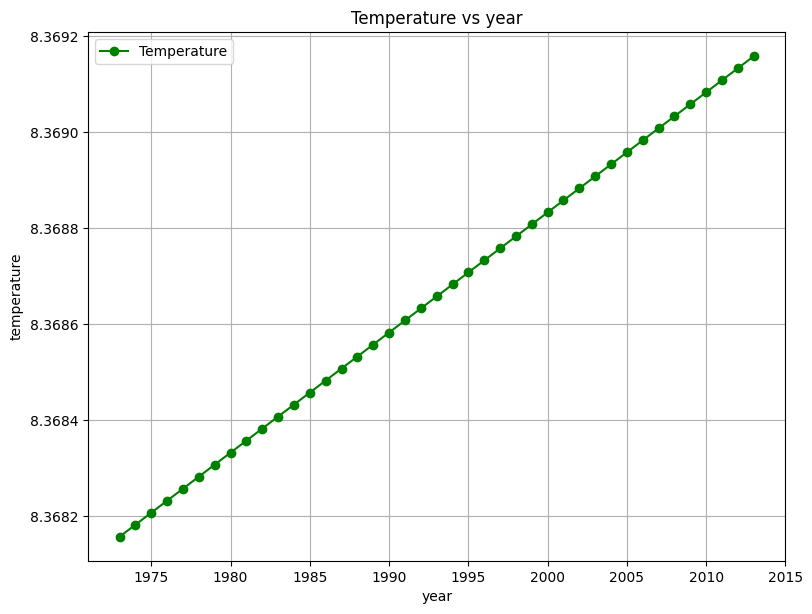

In [74]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(y,'go-')
plt.xlabel("year")
plt.ylabel("temperature")
plt.legend(["Temperature"])
plt.title('Temperature vs year')
plt.grid(True)

As we can see in the above diagram, the Temperature went down until 1875 and then it increasing through the years.

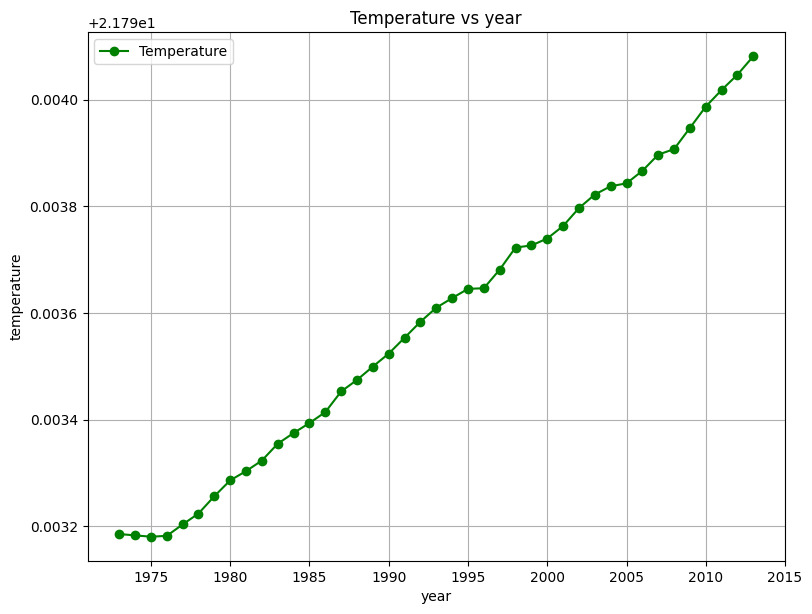

In [77]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(x,'go-')
plt.xlabel("year")
plt.ylabel("temperature")
plt.legend(["Temperature"])
plt.title('Temperature vs year')
plt.grid(True)

In this graphic above we can se that the global temperature increase smoothly trough the years.

EXPLORATION PHASE
QUESTION 1:

<AxesSubplot:xlabel='year'>

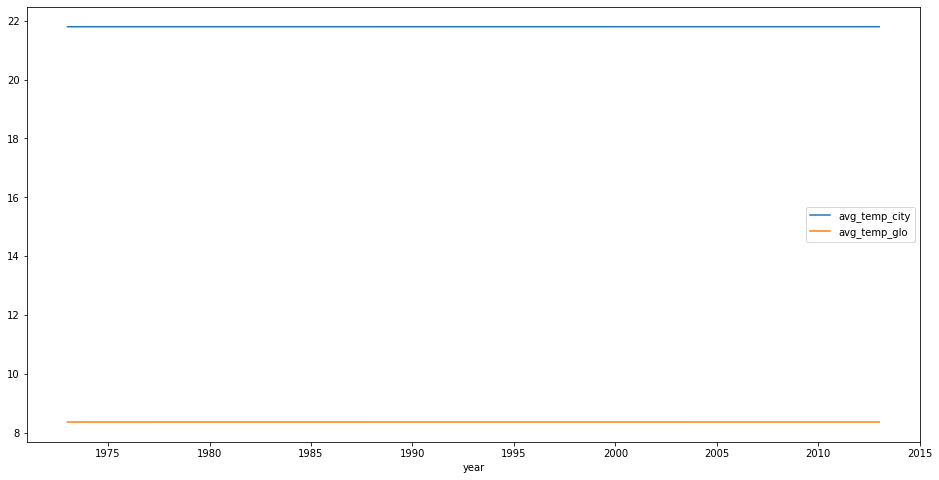

In [62]:
df4[['avg_temp_city', 'avg_temp_glo']].plot(label='temperature vs year',figsize=(16, 8))


In this graphic we can check that moving averege of the city temperature and the global temperature. with a window of 40 years.

Text(0, 0.5, 'temperature')

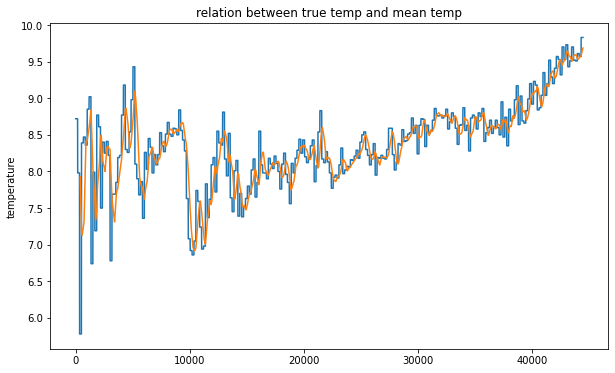

In [73]:
#temperature over mean
df['temp'].plot(figsize=(10,6))
df['temp'].rolling(window =400).mean().plot()
plt.title('relation between true temp and mean temp')
plt.ylabel('temperature')

In this graph we can see the mean of the global temperature related with the trouly information of temperature in the dataset, with somwe null values.

In [66]:
x=df4['avg_temp_city']
y=df4['avg_temp_glo']
z=df['year']

Now in this case we can notice that the global temperature increased more or less from 5.5 C° up to almost 10C°, and the temperature in cali have a smaller variation from 21C° up to 23C°, an increment of 2 C°. Also the temperature in Cali increased with a lot of gaps (variation) compared to the rest of the world.

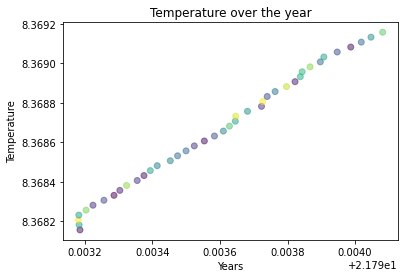

In [43]:
N = 41
colors = np.random.rand(N)
area = (40 * np.random.rand(N))**2  # 0 to 15 point radii
plt.title("Temperature over last 40 years")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

we can also conclude that is there a relevant correlation between temperature and year, the temparature increse over the time as we can see in the graphic.

CONCLUSIONS

As we can see from the graphics above we can conclude that: 
1-over the years the temperature have been increased a lot.
2-The city in question the temperature increased just 2 degrees, this could be related due to the geographic condition, the undeveloped industry infrastructure and the low rate of vehicles compared to the rest of the world.
3-Global temperature increased a lot up to almost 5.5C° during the years due to the globalization and the consumerism.
4-The increasing rate of temperature is linear in the last graph.
5-The relationwe can find on the graph with the average global temperature and the average city temperature is that the mean of the temperature is more or less stabilized and linear, so during the years the growth rate is constant.   

LIMITATION

The limitations in this dataset are some null values in the city_tempearture field during the data collection, that could affect the final results.